For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

+ lat : String variable, Latitude
+ lng: String variable, Longitude
+ desc: String variable, Description of the Emergency Call
+ zip: String variable, Zipcode
+ title: String variable, Title
+ timeStamp: String variable, YYYY-MM-DD HH:MM:SS
+ twp: String variable, Township
+ addr: String variable, Address
+ e: String variable, Index column (always 1)

### **1. Data and Setup**

In [98]:
import numpy as np
import pandas as pd

In [99]:
import matplotlib as plt
import seaborn as sns

In [100]:
df = pd.read_csv('911.csv')

Check the `info()` of the `df`:

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check the `head` of `df`:

In [102]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### **Learn about data.**

Top 5 zipcodes for 911 calls:

In [103]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

Top 5 townships (twp) for 911 calls:

In [104]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

The number of unique title codes:

In [105]:
df['title'].nunique()

110

### **Creating new features.**

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We will create a new column called "Reason" that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [106]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

The most common Reason for a 911 call:

In [107]:
df['Reason'].value_counts().head()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

Now, we are using `seaborn` to create a countplot of 911 calls by Reason:

C:\Users\lephu\AppData\Local\Temp\ipykernel_11564\4024703982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Reason', palette='viridis')


<Axes: xlabel='Reason', ylabel='count'>

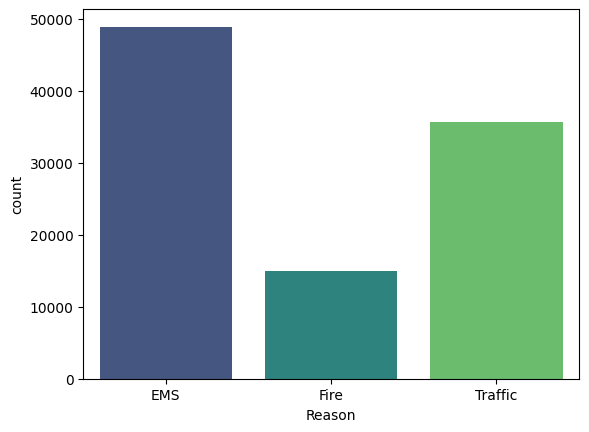

In [108]:
sns.countplot(data=df, x='Reason', palette='viridis')

Now let us begin to focus on time information. The data type of the objects in the timeStamp column:

In [109]:
type(df['timeStamp'].iloc[0])

str

We should have seen that these timestamps are still strings. We will then use [`pd.to_datetime`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [110]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [111]:
time = df['timeStamp'].iloc[0]
print('Hour:', str(time.hour) + ':' + str(time.minute) + ':' + str(time.second), 'Day:', time.day, 'Month:', time.month, 'Year:', time.year)

Hour: 17:40:0 Day: 10 Month: 12 Year: 2015


Now that the timestamp column are actually DateTime objects, we will create 3 new columns called Hour, Month, and Day of Week.

In [112]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [113]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

Notice how the Day of Week is an integer 0-6. We will convert from the actual string names to the day of the week:

In [114]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [115]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [116]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

Now use `seaborn` to create a countplot of the Day of Week column with the hue based off of the Reason column.

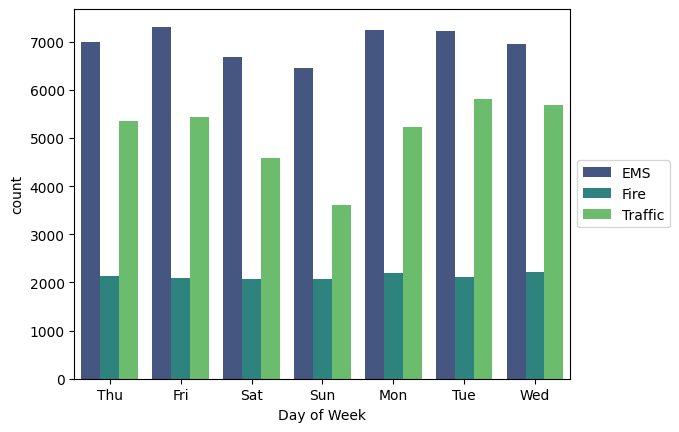

In [117]:
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Day of Week', hue='Reason', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

We do the same for Month:

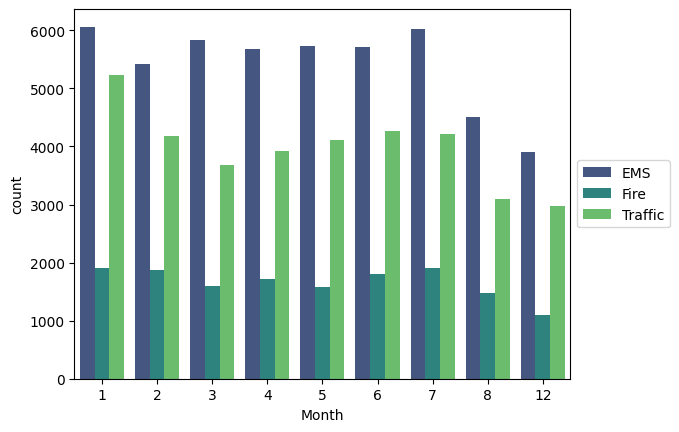

In [118]:
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

You should have noticed it was missing some Months (it is missing some months: 9,10, and 11 are not there.), let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with `pandas`.

Now create a gropuby object called 'byMonth', where you group the DataFrame by the month column and use the `count()` method for aggregation.

In [119]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Now create a simple plot off of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

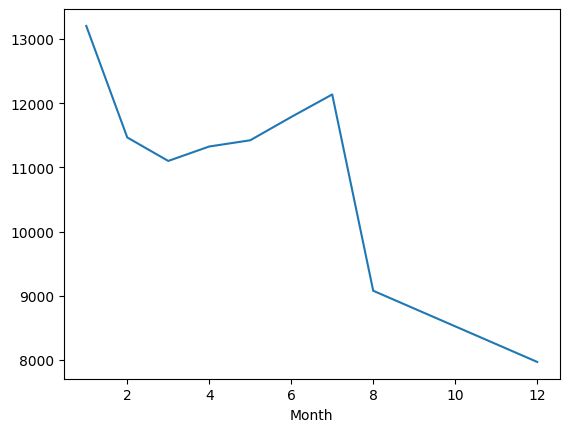

In [120]:
# Could be any column
byMonth['timeStamp'].plot()

Now see if you can use `seaborn`'s `lmplot()` to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

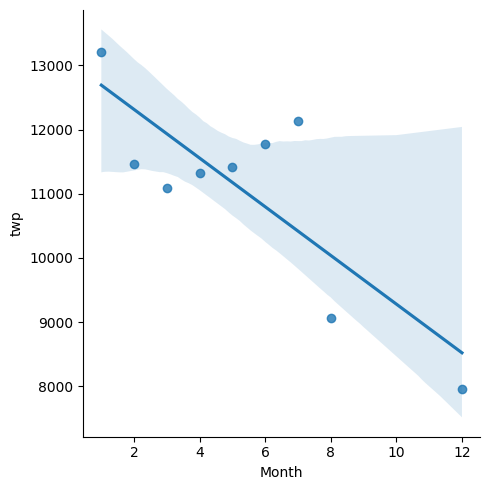

In [121]:
sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp')

Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the `.date()` method.

In [122]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

Now groupby this Date column with the `count()` aggregate and create a plot of counts of 911 calls.

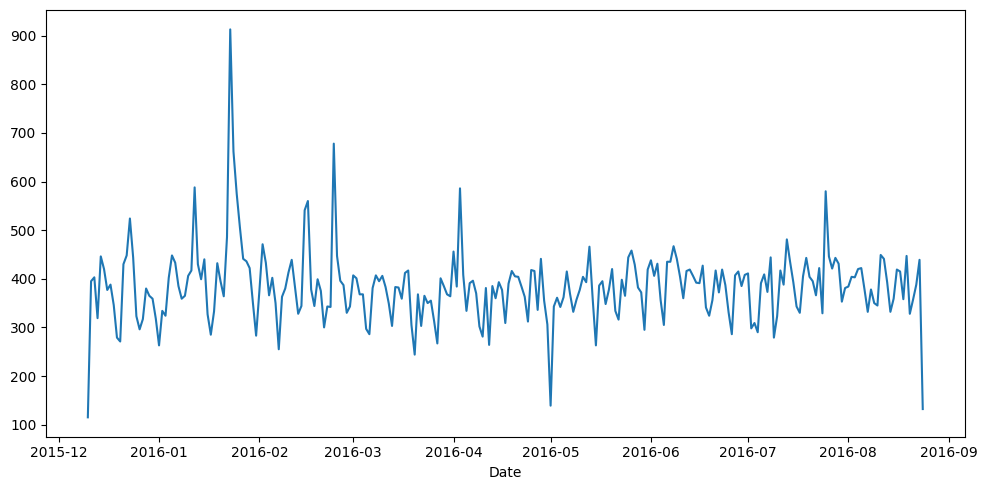

In [123]:
df.groupby('Date').count()['twp'].plot(figsize=(10, 5))
plt.tight_layout()

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.

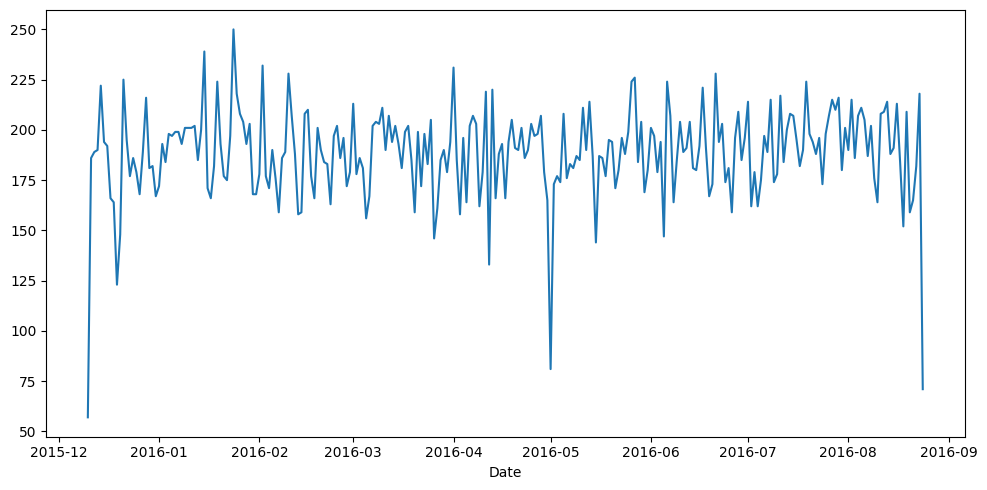

In [124]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot(figsize=(10, 5))
plt.tight_layout()

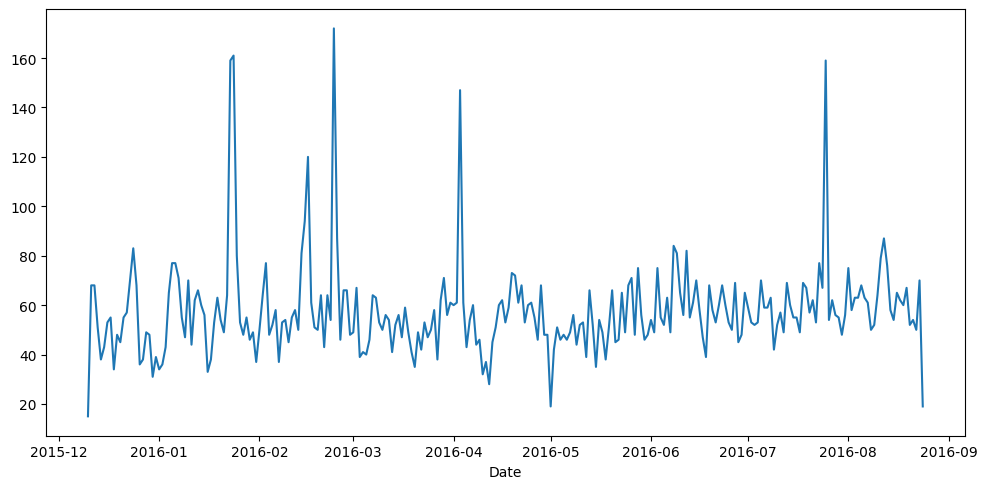

In [125]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot(figsize=(10, 5))
plt.tight_layout()

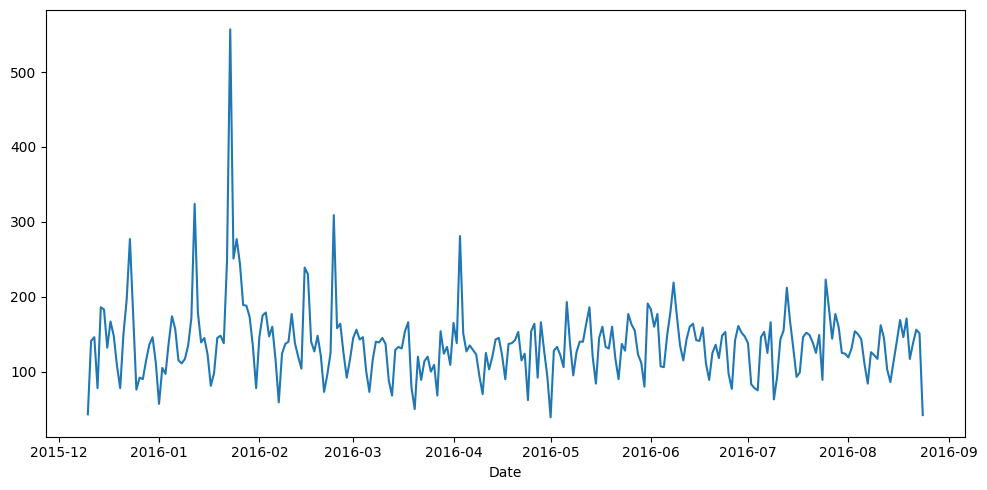

In [126]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot(figsize=(10, 5))
plt.tight_layout()

Now let's move on to creating  `heatmaps` with `seaborn` and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [127]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack() # unstack() is used to convert the series into a dataframe
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Now create a `HeatMap` using this new DataFrame.

<Axes: xlabel='Hour', ylabel='Day of Week'>

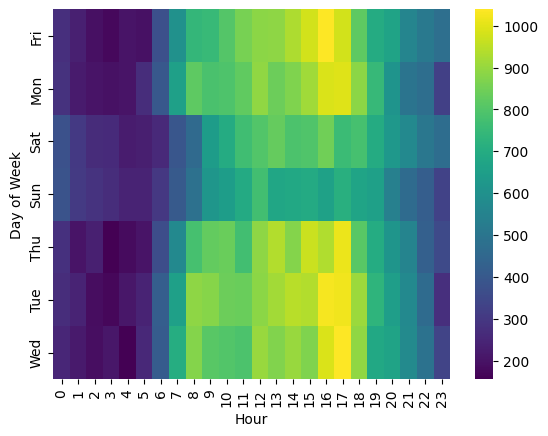

In [131]:
sns.heatmap(dayHour, cmap='viridis')

Now create a `clustermap` using this DataFrame.

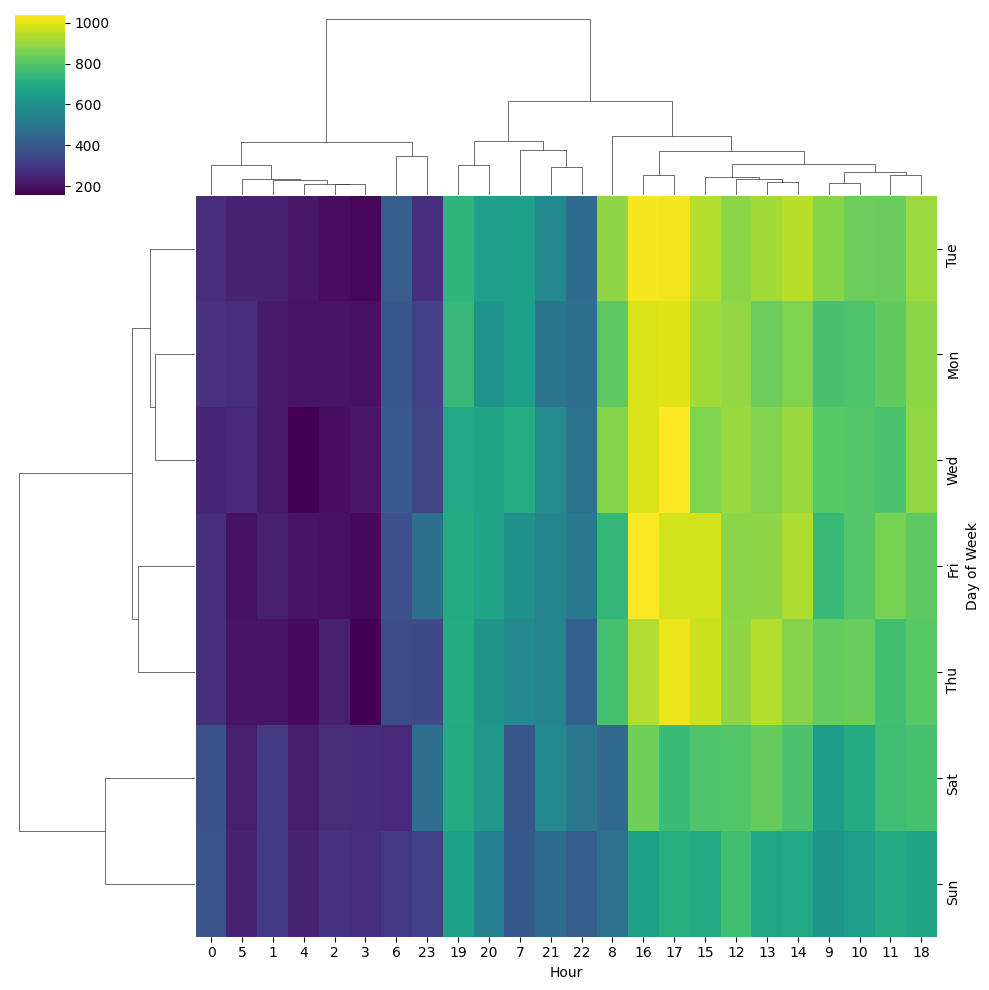

In [132]:
sns.clustermap(dayHour, cmap='viridis')